In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import warnings
warnings.filterwarnings("ignore")

def get_res_df(reports_path, sendrates):
    frames_all = []
    for rate in sendrates:
        frames = []
        for i in range(1,6):
            filename = 'report-{}-{}.html'.format(rate, i)
            df = pd.read_html(join(reports_path, filename), flavor='bs4')[0]
            frames.append(df)
        df_concated = pd.concat(frames)
        df_mean = df_concated.groupby('Name').mean()
        df_mean['Rate'] = rate
        frames_all.append(df_mean)
    df_res = pd.concat(frames_all)
    return df_res

def plot_without_real_sendrate(df_res):
    openTPS = df_res[df_res.index=='open']['Throughput (TPS)'].values
    queryTPS = df_res[df_res.index=='query']['Throughput (TPS)'].values
    transferTPS = df_res[df_res.index=='transfer']['Throughput (TPS)'].values

    openLatency = df_res[df_res.index=='open']['Avg Latency (s)'].values
    queryLatency = df_res[df_res.index=='query']['Avg Latency (s)'].values
    transferLatency = df_res[df_res.index=='transfer']['Avg Latency (s)'].values

    fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
    axs[0].plot(sendrates, openTPS, label='open', marker='*')
    axs[0].plot(sendrates, queryTPS, label='query', marker='d')
    axs[0].plot(sendrates, transferTPS, label='transfer', marker='<')
    axs[0].set(title='Besu Throughput under Varying Send Rates', 
        xlabel='Send rate (TPS)', ylabel='Throughput (TPS)')
    axs[0].grid()
    axs[0].legend()

    axs[1].plot(sendrates, openLatency, label='open', marker='*')
    axs[1].plot(sendrates, queryLatency, label='query', marker='d')
    axs[1].plot(sendrates, transferLatency, label='transfer', marker='<')
    axs[1].set(title='Besu Latency under Varying Send Rates', 
        xlabel='Send rate (TPS)', ylabel='Latency (S)')
    axs[1].grid()
    axs[1].legend()

def plot_with_real_sendrate(df_res):
    openTPS = df_res[df_res.index=='open']['Throughput (TPS)'].values
    openSendRate = df_res[df_res.index=='open']['Send Rate (TPS)'].values
    queryTPS = df_res[df_res.index=='query']['Throughput (TPS)'].values
    querySendRate = df_res[df_res.index=='query']['Send Rate (TPS)'].values
    transferTPS = df_res[df_res.index=='transfer']['Throughput (TPS)'].values
    transferSendRate = df_res[df_res.index=='transfer']['Send Rate (TPS)'].values

    openLatency = df_res[df_res.index=='open']['Avg Latency (s)'].values
    queryLatency = df_res[df_res.index=='query']['Avg Latency (s)'].values
    transferLatency = df_res[df_res.index=='transfer']['Avg Latency (s)'].values

    fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
    axs[0].plot(sendrates, openTPS, label='open', marker='*')
    axs[0].plot(sendrates, openSendRate, 'y--', label='open send rate', marker='*')
    axs[0].plot(sendrates, queryTPS, label='query', marker='d')
    axs[0].plot(sendrates, querySendRate, 'y--', label='query send rate', marker='d')
    axs[0].plot(sendrates, transferTPS, label='transfer', marker='<')
    axs[0].plot(sendrates, transferSendRate, 'y--', label='transfer send rate', marker='<')
    axs[0].set(title='Besu Throughput under Varying Send Rates', 
        xlabel='Send rate (TPS)', ylabel='Throughput (TPS)')
    axs[0].grid()
    axs[0].legend()

    axs[1].plot(sendrates, openLatency, label='open', marker='*')
    axs[1].plot(sendrates, queryLatency, label='query', marker='d')
    axs[1].plot(sendrates, transferLatency, label='transfer', marker='<')
    axs[1].set(title='Besu Latency under Varying Send Rates', 
        xlabel='Send rate (TPS)', ylabel='Latency (S)')
    axs[1].grid()
    axs[1].legend()

In [5]:
path = '../caliper-benchmarks/reports'
sendrates = np.arange(40,240,40)
df_res = get_res_df(path, sendrates) 
df_res

,Succ,Fail,Send Rate (TPS),Max Latency (s),Min Latency (s),Avg Latency (s),Throughput (TPS),Rate
Name,,,,,,,,
open,1000.0,0.0,37.36,8.398,0.872,3.766,32.74,40
query,1000.0,0.0,39.60,0.474,0.030,0.060,39.56,40
transfer,1000.0,0.0,39.88,5.328,0.750,2.658,36.58,40
open,1000.0,0.0,67.68,11.548,1.954,6.002,49.78,80
query,1000.0,0.0,79.14,0.578,0.018,0.076,78.84,80
transfer,1000.0,0.0,56.58,19.504,1.104,9.362,31.22,80
open,1000.0,0.0,95.46,17.864,1.052,8.480,41.26,120
query,1000.0,0.0,118.14,0.450,0.022,0.082,117.36,120
transfer,1000.0,0.0,118.62,22.350,1.714,11.846,39.46,120


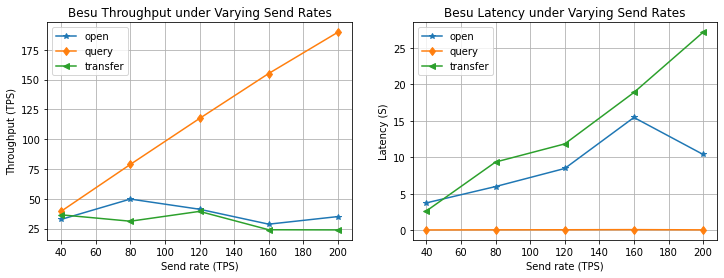

In [6]:
plot_without_real_sendrate(df_res)

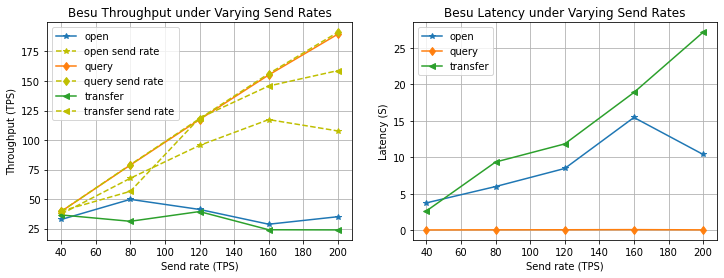

In [7]:
plot_with_real_sendrate(df_res)

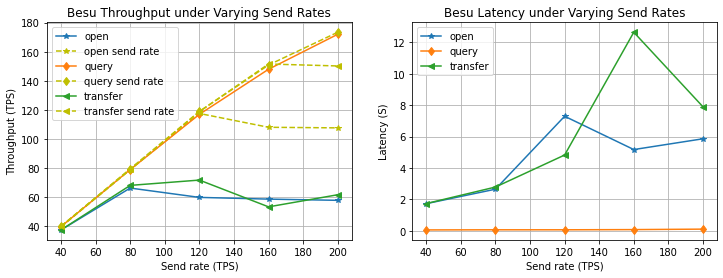

In [8]:
path_reports_4nodes = '../caliper-benchmarks/reports-20211021-154623'
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

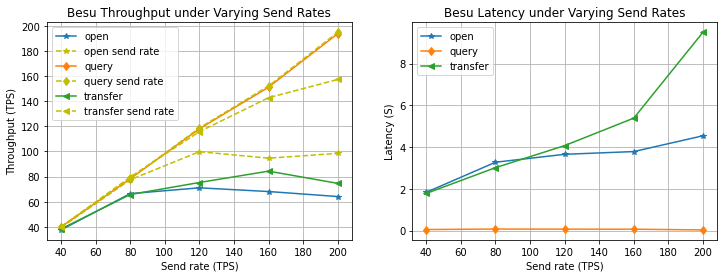

In [9]:
path_reports_4nodes = '../caliper-benchmarks/reports-20211021-165809'
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

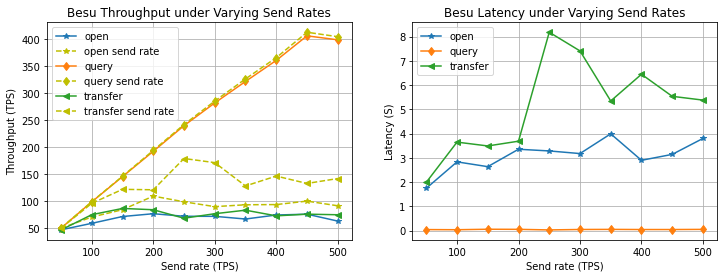

In [10]:
path_reports_4nodes = '../caliper-benchmarks/reports-20211022-095931'
sendrates = np.arange(50, 550, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

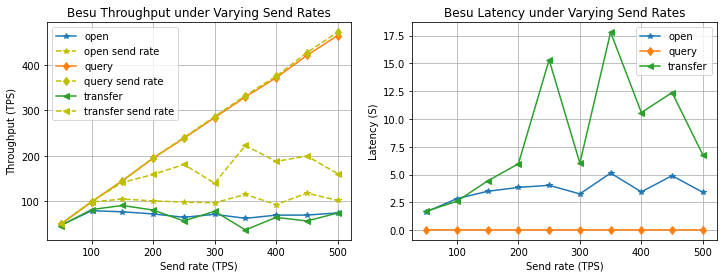

In [23]:
path_reports_4nodes = '../caliper-benchmarks/reports-20211022-171023'
sendrates = np.arange(50, 550, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

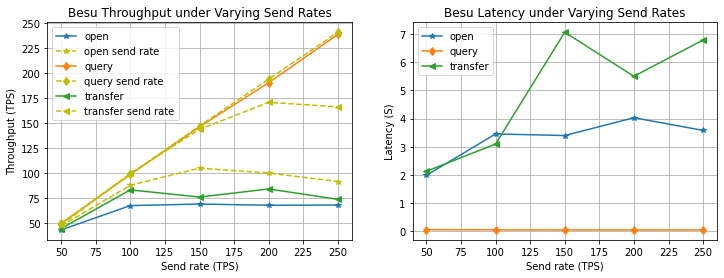

In [12]:
path_reports_4nodes = '../caliper-benchmarks/reports-20211119-105937'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

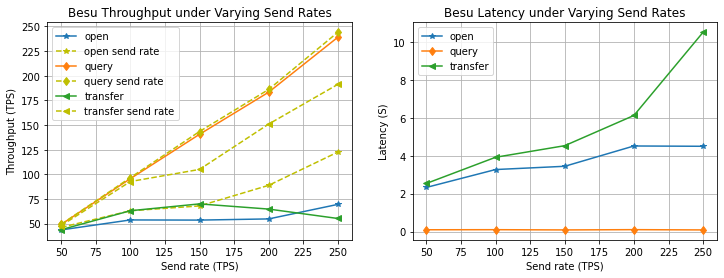

In [2]:
# 4 vcpu 15 gram
path_reports_4nodes = '../caliper-benchmarks/reports-20211129-152024'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

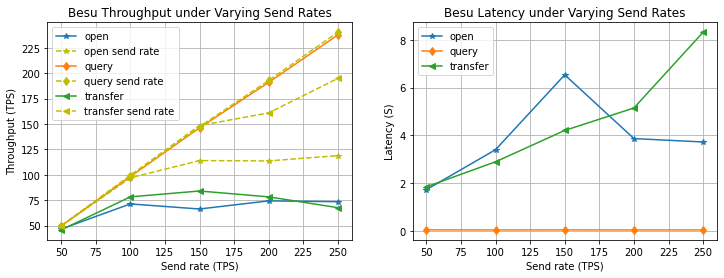

In [3]:
# 8u30g
path_reports_4nodes = '../caliper-benchmarks/reports-20211130-140232'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

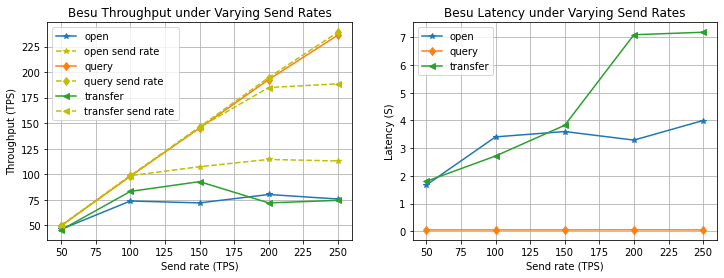

In [4]:
# 16u60gram
path_reports_4nodes = '../caliper-benchmarks/reports-20211130-162538'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

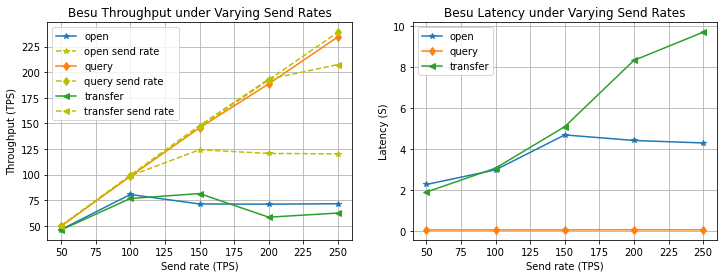

In [3]:
# 4u8gram (Cybera)
path_reports_4nodes = '../caliper-benchmarks/reports/20211213-192953'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

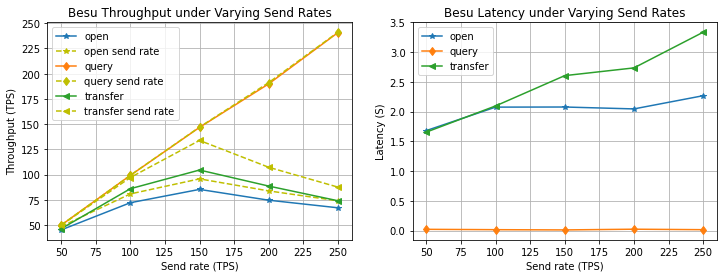

In [43]:
# 8u8gram (Cybera)
path_reports_4nodes = '../caliper-benchmarks/reports/20211214-094805-8c8gb'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

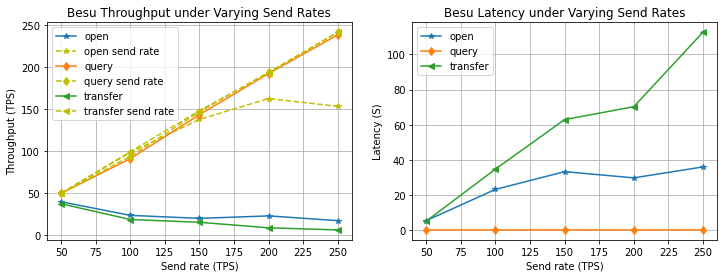

In [5]:
# 2u4gram (Cybera)
path_reports_4nodes = '../caliper-benchmarks/reports/20211213-215339-2c4gb'
sendrates = np.arange(50, 300, 50)
df_res = get_res_df(path_reports_4nodes, sendrates)
plot_with_real_sendrate(df_res)

In [4]:
path_reports_4nodes_1 = '../caliper-benchmarks/reports-20211129-152024'
path_reports_4nodes_2 = '../caliper-benchmarks/reports-20211130-140232'
path_reports_4nodes_3 = '../caliper-benchmarks/reports-20211130-162538'
sendrates = np.arange(50, 300, 50)
df_res_1 = get_res_df(path_reports_4nodes_1, sendrates)
df_res_2 = get_res_df(path_reports_4nodes_2, sendrates)
df_res_3 = get_res_df(path_reports_4nodes_3, sendrates)

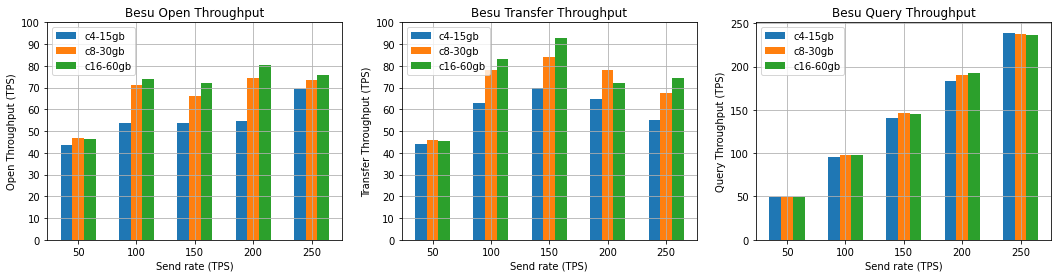

In [33]:
openTPS_1 = df_res_1[df_res_1.index=='open']['Throughput (TPS)'].values
openTPS_2 = df_res_2[df_res_2.index=='open']['Throughput (TPS)'].values
openTPS_3 = df_res_3[df_res_3.index=='open']['Throughput (TPS)'].values
queryTPS_1 = df_res_1[df_res_1.index=='query']['Throughput (TPS)'].values
queryTPS_2 = df_res_2[df_res_2.index=='query']['Throughput (TPS)'].values
queryTPS_3 = df_res_3[df_res_3.index=='query']['Throughput (TPS)'].values
transferTPS_1 = df_res_1[df_res_1.index=='transfer']['Throughput (TPS)'].values
transferTPS_2 = df_res_2[df_res_2.index=='transfer']['Throughput (TPS)'].values
transferTPS_3 = df_res_3[df_res_3.index=='transfer']['Throughput (TPS)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']
Y_ticks = np.arange(0, 110, 10)
axs[0].bar(X_axis - 0.2, openTPS_1, 0.2, label='c4-15gb')
axs[0].bar(X_axis, openTPS_2, 0.2, label='c8-30gb')
axs[0].bar(X_axis + 0.2, openTPS_3, 0.2, label='c16-60gb')
axs[0].set(title='Besu Open Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Open Throughput (TPS)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferTPS_1, 0.2, label='c4-15gb')
axs[1].bar(X_axis, transferTPS_2, 0.2, label='c8-30gb')
axs[1].bar(X_axis + 0.2, transferTPS_3, 0.2, label='c16-60gb')
axs[1].set(title='Besu Transfer Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Transfer Throughput (TPS)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryTPS_1, 0.2, label='c4-15gb')
axs[2].bar(X_axis, queryTPS_2, 0.2, label='c8-30gb')
axs[2].bar(X_axis + 0.2, queryTPS_3, 0.2, label='c16-60gb')
axs[2].set(title='Besu Query Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks_2, ylabel='Query Throughput (TPS)')
axs[2].grid()
axs[2].legend(loc='upper left')


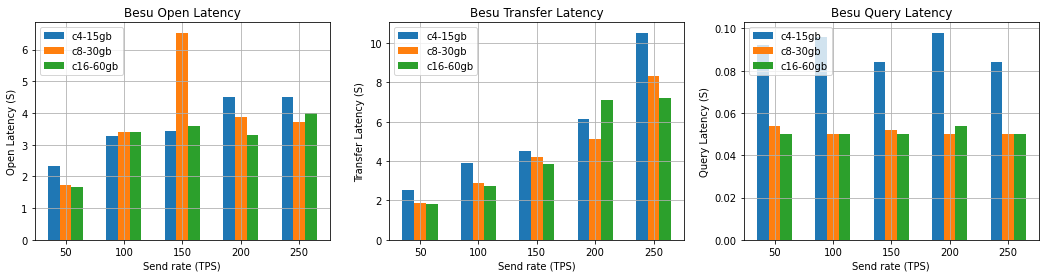

In [37]:
openLatency_1 = df_res_1[df_res_1.index=='open']['Avg Latency (s)'].values
openLatency_2 = df_res_2[df_res_2.index=='open']['Avg Latency (s)'].values
openLatency_3 = df_res_3[df_res_3.index=='open']['Avg Latency (s)'].values
queryLatency_1 = df_res_1[df_res_1.index=='query']['Avg Latency (s)'].values
queryLatency_2 = df_res_2[df_res_2.index=='query']['Avg Latency (s)'].values
queryLatency_3 = df_res_3[df_res_3.index=='query']['Avg Latency (s)'].values
transferLatency_1 = df_res_1[df_res_1.index=='transfer']['Avg Latency (s)'].values
transferLatency_2 = df_res_2[df_res_2.index=='transfer']['Avg Latency (s)'].values
transferLatency_3 = df_res_3[df_res_3.index=='transfer']['Avg Latency (s)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']

axs[0].bar(X_axis - 0.2, openLatency_1, 0.2, label='c4-15gb')
axs[0].bar(X_axis, openLatency_2, 0.2, label='c8-30gb')
axs[0].bar(X_axis + 0.2, openLatency_3, 0.2, label='c16-60gb')
axs[0].set(title='Besu Open Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Open Latency (S)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferLatency_1, 0.2, label='c4-15gb')
axs[1].bar(X_axis, transferLatency_2, 0.2, label='c8-30gb')
axs[1].bar(X_axis + 0.2, transferLatency_3, 0.2, label='c16-60gb')
axs[1].set(title='Besu Transfer Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Transfer Latency (S)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryLatency_1, 0.2, label='c4-15gb')
axs[2].bar(X_axis, queryLatency_2, 0.2, label='c8-30gb')
axs[2].bar(X_axis + 0.2, queryLatency_3, 0.2, label='c16-60gb')
axs[2].set(title='Besu Query Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Query Latency (S)')
axs[2].grid()
axs[2].legend(loc='upper left')

In [44]:
path_reports_4nodes_1 = '../caliper-benchmarks/reports/20211213-215339-2c4gb'
path_reports_4nodes_2 = '../caliper-benchmarks/reports/20211213-192953-4c8gb'
path_reports_4nodes_3 = '../caliper-benchmarks/reports/20211214-094805-8c8gb'
sendrates = np.arange(50, 300, 50)
df_res_1 = get_res_df(path_reports_4nodes_1, sendrates)
df_res_2 = get_res_df(path_reports_4nodes_2, sendrates)
df_res_3 = get_res_df(path_reports_4nodes_3, sendrates)

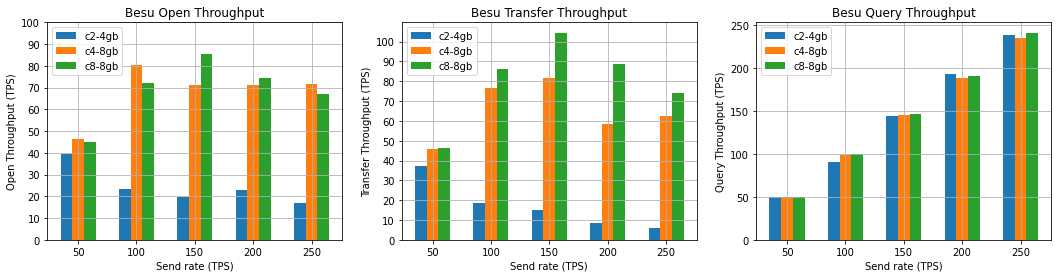

In [50]:
openTPS_1 = df_res_1[df_res_1.index=='open']['Throughput (TPS)'].values
openTPS_2 = df_res_2[df_res_2.index=='open']['Throughput (TPS)'].values
openTPS_3 = df_res_3[df_res_3.index=='open']['Throughput (TPS)'].values
queryTPS_1 = df_res_1[df_res_1.index=='query']['Throughput (TPS)'].values
queryTPS_2 = df_res_2[df_res_2.index=='query']['Throughput (TPS)'].values
queryTPS_3 = df_res_3[df_res_3.index=='query']['Throughput (TPS)'].values
transferTPS_1 = df_res_1[df_res_1.index=='transfer']['Throughput (TPS)'].values
transferTPS_2 = df_res_2[df_res_2.index=='transfer']['Throughput (TPS)'].values
transferTPS_3 = df_res_3[df_res_3.index=='transfer']['Throughput (TPS)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']
Y_ticks = np.arange(0, 110, 10)
axs[0].bar(X_axis - 0.2, openTPS_1, 0.2, label='c2-4gb')
axs[0].bar(X_axis, openTPS_2, 0.2, label='c4-8gb')
axs[0].bar(X_axis + 0.2, openTPS_3, 0.2, label='c8-8gb')
axs[0].set(title='Besu Open Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Open Throughput (TPS)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferTPS_1, 0.2, label='c2-4gb')
axs[1].bar(X_axis, transferTPS_2, 0.2, label='c4-8gb')
axs[1].bar(X_axis + 0.2, transferTPS_3, 0.2, label='c8-8gb')
axs[1].set(title='Besu Transfer Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Transfer Throughput (TPS)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryTPS_1, 0.2, label='c2-4gb')
axs[2].bar(X_axis, queryTPS_2, 0.2, label='c4-8gb')
axs[2].bar(X_axis + 0.2, queryTPS_3, 0.2, label='c8-8gb')
axs[2].set(title='Besu Query Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks_2, ylabel='Query Throughput (TPS)')
axs[2].grid()
axs[2].legend(loc='upper left')


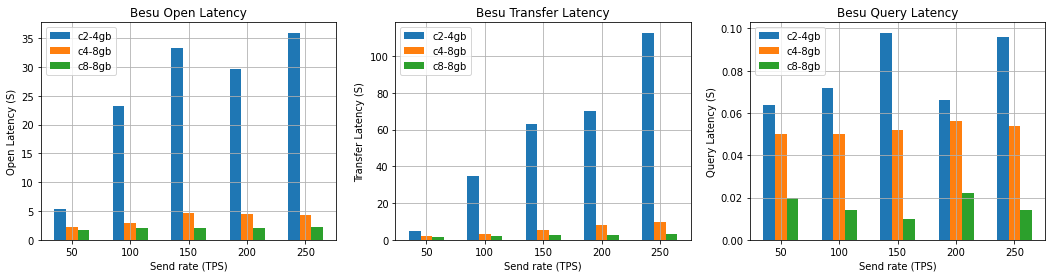

In [49]:
openLatency_1 = df_res_1[df_res_1.index=='open']['Avg Latency (s)'].values
openLatency_2 = df_res_2[df_res_2.index=='open']['Avg Latency (s)'].values
openLatency_3 = df_res_3[df_res_3.index=='open']['Avg Latency (s)'].values
queryLatency_1 = df_res_1[df_res_1.index=='query']['Avg Latency (s)'].values
queryLatency_2 = df_res_2[df_res_2.index=='query']['Avg Latency (s)'].values
queryLatency_3 = df_res_3[df_res_3.index=='query']['Avg Latency (s)'].values
transferLatency_1 = df_res_1[df_res_1.index=='transfer']['Avg Latency (s)'].values
transferLatency_2 = df_res_2[df_res_2.index=='transfer']['Avg Latency (s)'].values
transferLatency_3 = df_res_3[df_res_3.index=='transfer']['Avg Latency (s)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']

axs[0].bar(X_axis - 0.2, openLatency_1, 0.2, label='c2-4gb')
axs[0].bar(X_axis, openLatency_2, 0.2, label='c4-8gb')
axs[0].bar(X_axis + 0.2, openLatency_3, 0.2, label='c8-8gb')
axs[0].set(title='Besu Open Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Open Latency (S)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferLatency_1, 0.2, label='c2-4gb')
axs[1].bar(X_axis, transferLatency_2, 0.2, label='c4-8gb')
axs[1].bar(X_axis + 0.2, transferLatency_3, 0.2, label='c8-8gb')
axs[1].set(title='Besu Transfer Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Transfer Latency (S)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryLatency_1, 0.2, label='c2-4gb')
axs[2].bar(X_axis, queryLatency_2, 0.2, label='c4-8gb')
axs[2].bar(X_axis + 0.2, queryLatency_3, 0.2, label='c8-8gb')
axs[2].set(title='Besu Query Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Query Latency (S)')
axs[2].grid()
axs[2].legend(loc='upper left')

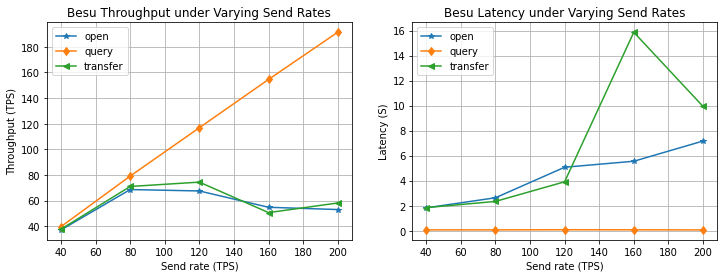

In [2]:
path = '../caliper-benchmarks/reports/20211219-173216'
sendrates = np.arange(40,240,40)
df_res = get_res_df(path, sendrates) 
plot_without_real_sendrate(df_res)

In [2]:
path = '../caliper-benchmarks/reports/20220126-200229-cyb-4'
sendrates = np.arange(50,300,50)
df_res = get_res_df(path, sendrates)
df_res

,Succ,Fail,Send Rate (TPS),Max Latency (s),Min Latency (s),Avg Latency (s),Throughput (TPS),Rate
Name,,,,,,,,
open,1000.0,0.0,49.64,3.354,0.488,1.858,46.46,50
query,1000.0,0.0,49.82,0.312,0.012,0.044,49.72,50
transfer,1000.0,0.0,50.00,3.812,0.590,1.988,45.74,50
open,1000.0,0.0,96.98,8.382,0.534,4.228,65.62,100
query,1000.0,0.0,98.52,0.164,0.016,0.040,98.14,100
transfer,1000.0,0.0,99.22,11.032,1.238,6.208,66.28,100
open,1000.0,0.0,109.76,6.634,0.920,3.680,72.42,150
query,1000.0,0.0,146.30,0.108,0.020,0.040,145.40,150
transfer,1000.0,0.0,142.06,7.772,1.380,3.974,86.36,150


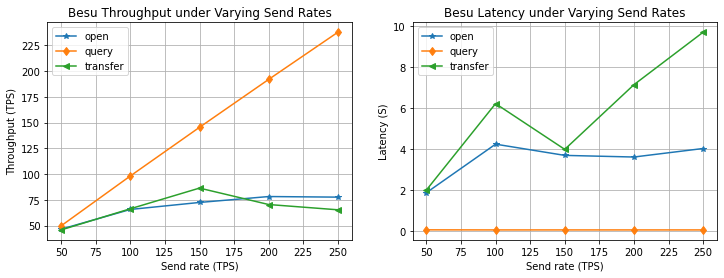

In [3]:
# plot 4 nodes
plot_without_real_sendrate(df_res)

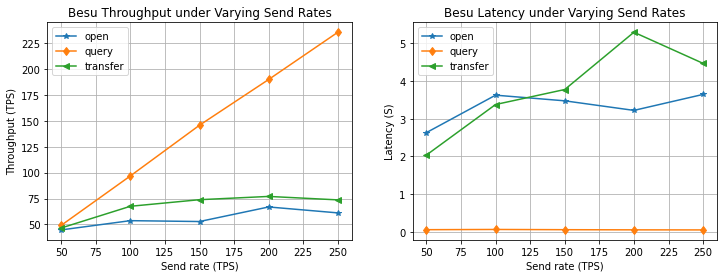

In [4]:
path = '../caliper-benchmarks/reports/20220127-110556-cyb-6'
sendrates = np.arange(50,300,50)
df_res = get_res_df(path, sendrates)
plot_without_real_sendrate(df_res)

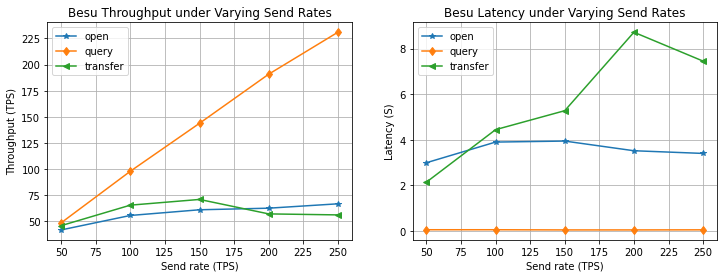

In [5]:
path = '../caliper-benchmarks/reports/20220127-144349-cyb-8'
sendrates = np.arange(50,300,50)
df_res = get_res_df(path, sendrates)
plot_without_real_sendrate(df_res)

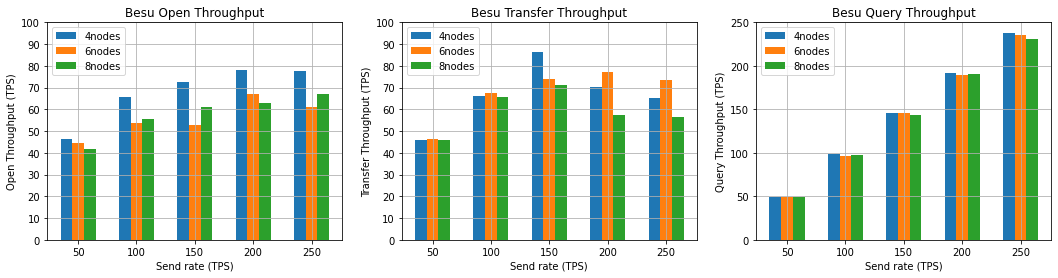

In [10]:
paths = ['../caliper-benchmarks/reports/20220126-200229-cyb-4', 
        '../caliper-benchmarks/reports/20220127-110556-cyb-6', 
        '../caliper-benchmarks/reports/20220127-144349-cyb-8']
sendrates = np.arange(50,300,50)
dfs = [get_res_df(path, sendrates) for path in paths]
df_res_1, df_res_2, df_res_3 = dfs[0], dfs[1], dfs[2]

metrics = ['Throughput (TPS)', 'Avg Latency (s)']
txTypes = ['open', 'query', 'transfer']
labels = ['4nodes', '6nodes', '8nodes']

# data = []
# for i in range(len(metrics)):
#     values = []
#     for j in range(len(txTypes)):
#         df = dfs[j]
#         value = df[df.index==txTypes[j]][metrics[i]].values
#         values.append(value)
#     data.append(values)
openTPS_1 = df_res_1[df_res_1.index=='open']['Throughput (TPS)'].values
openTPS_2 = df_res_2[df_res_2.index=='open']['Throughput (TPS)'].values
openTPS_3 = df_res_3[df_res_3.index=='open']['Throughput (TPS)'].values
queryTPS_1 = df_res_1[df_res_1.index=='query']['Throughput (TPS)'].values
queryTPS_2 = df_res_2[df_res_2.index=='query']['Throughput (TPS)'].values
queryTPS_3 = df_res_3[df_res_3.index=='query']['Throughput (TPS)'].values
transferTPS_1 = df_res_1[df_res_1.index=='transfer']['Throughput (TPS)'].values
transferTPS_2 = df_res_2[df_res_2.index=='transfer']['Throughput (TPS)'].values
transferTPS_3 = df_res_3[df_res_3.index=='transfer']['Throughput (TPS)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']
Y_ticks = np.arange(0, 110, 10)
axs[0].bar(X_axis - 0.2, openTPS_1, 0.2, label=labels[0])
axs[0].bar(X_axis, openTPS_2, 0.2, label=labels[1])
axs[0].bar(X_axis + 0.2, openTPS_3, 0.2, label=labels[2])
axs[0].set(title='Besu Open Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Open Throughput (TPS)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferTPS_1, 0.2, label=labels[0])
axs[1].bar(X_axis, transferTPS_2, 0.2, label=labels[1])
axs[1].bar(X_axis + 0.2, transferTPS_3, 0.2, label=labels[2])
axs[1].set(title='Besu Transfer Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks, ylabel='Transfer Throughput (TPS)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryTPS_1, 0.2, label=labels[0])
axs[2].bar(X_axis, queryTPS_2, 0.2, label=labels[1])
axs[2].bar(X_axis + 0.2, queryTPS_3, 0.2, label=labels[2])
axs[2].set(title='Besu Query Throughput', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, 
    yticks=Y_ticks_2, ylabel='Query Throughput (TPS)')
axs[2].grid()
axs[2].legend(loc='upper left')

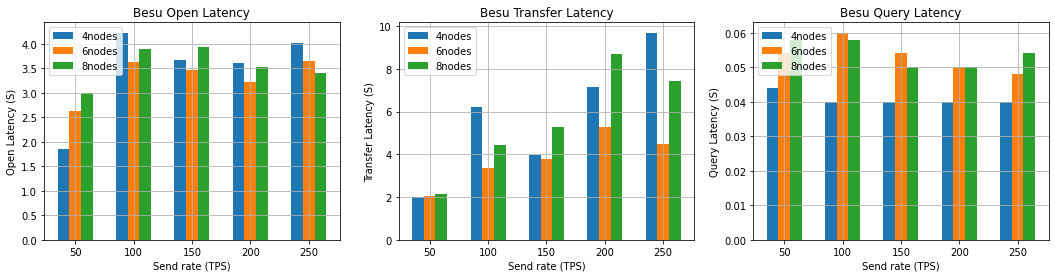

In [11]:
openLatency_1 = df_res_1[df_res_1.index=='open']['Avg Latency (s)'].values
openLatency_2 = df_res_2[df_res_2.index=='open']['Avg Latency (s)'].values
openLatency_3 = df_res_3[df_res_3.index=='open']['Avg Latency (s)'].values
queryLatency_1 = df_res_1[df_res_1.index=='query']['Avg Latency (s)'].values
queryLatency_2 = df_res_2[df_res_2.index=='query']['Avg Latency (s)'].values
queryLatency_3 = df_res_3[df_res_3.index=='query']['Avg Latency (s)'].values
transferLatency_1 = df_res_1[df_res_1.index=='transfer']['Avg Latency (s)'].values
transferLatency_2 = df_res_2[df_res_2.index=='transfer']['Avg Latency (s)'].values
transferLatency_3 = df_res_3[df_res_3.index=='transfer']['Avg Latency (s)'].values

fig, axs = plt.subplots(figsize=(18,4), ncols=3, nrows=1)
X_axis = np.arange(len(sendrates))
X_labels = ['0','50', '100', '150', '200', '250']

axs[0].bar(X_axis - 0.2, openLatency_1, 0.2, label=labels[0])
axs[0].bar(X_axis, openLatency_2, 0.2, label=labels[1])
axs[0].bar(X_axis + 0.2, openLatency_3, 0.2, label=labels[2])
axs[0].set(title='Besu Open Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Open Latency (S)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].bar(X_axis - 0.2, transferLatency_1, 0.2, label=labels[0])
axs[1].bar(X_axis, transferLatency_2, 0.2, label=labels[1])
axs[1].bar(X_axis + 0.2, transferLatency_3, 0.2, label=labels[2])
axs[1].set(title='Besu Transfer Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Transfer Latency (S)')
axs[1].grid()
axs[1].legend(loc='upper left')

Y_ticks_2 = np.arange(0, 300, 50)
axs[2].bar(X_axis - 0.2, queryLatency_1, 0.2, label=labels[0])
axs[2].bar(X_axis, queryLatency_2, 0.2, label=labels[1])
axs[2].bar(X_axis + 0.2, queryLatency_3, 0.2, label=labels[2])
axs[2].set(title='Besu Query Latency', 
    xlabel='Send rate (TPS)', xticklabels=X_labels, ylabel='Query Latency (S)')
axs[2].grid()
axs[2].legend(loc='upper left')